In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shreyasur965/super-heroes-dataset")

print("Path to dataset files:", path)

100%|██████████| 109k/109k [00:00<00:00, 314kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shreyasur965/super-heroes-dataset/versions/3


In [3]:
import pandas as pd
import numpy as np
import pyspark
import os
import ast
import seaborn as sns
import matplotlib.pyplot as plt


# Pobierz zestaw danych
path = kagglehub.dataset_download("shreyasur965/super-heroes-dataset")

# Załaduj dane z pliku CSV
dataset_path = os.path.join(path, 'superheroes_data.csv')  # Upewnij się, że używasz właściwej nazwy pliku
data = pd.read_csv(dataset_path)
data = pd.DataFrame(data)
# Wyświetlenie pierwszych kilku wierszy danych
print(data.head())


   id         name  intelligence  strength  speed  durability  power  combat  \
0   1       A-Bomb          38.0     100.0   17.0        80.0   24.0    64.0   
1   2   Abe Sapien          88.0      28.0   35.0        65.0  100.0    85.0   
2   3     Abin Sur          50.0      90.0   53.0        64.0   99.0    65.0   
3   4  Abomination          63.0      80.0   53.0        90.0   62.0    95.0   
4   5      Abraxas          88.0      63.0   83.0       100.0  100.0    55.0   

                full-name            alter-egos  ...               race  \
0  Richard Milhouse Jones  No alter egos found.  ...              Human   
1          Abraham Sapien  No alter egos found.  ...      Icthyo Sapien   
2                     NaN  No alter egos found.  ...            Ungaran   
3            Emil Blonsky  No alter egos found.  ...  Human / Radiation   
4                 Abraxas  No alter egos found.  ...      Cosmic Entity   

              height                weight eye-color hair-color  \
0

In [4]:
data.describe()

,id,intelligence,strength,speed,durability,power,combat
count,731.000000,566.000000,629.000000,566.000000,566.000000,566.000000,566.000000
mean,366.000000,64.445230,44.001590,40.249117,58.973498,64.243816,61.597173
std,211.165812,19.989369,32.886676,24.416224,30.060311,29.797914,23.349979
min,1.000000,6.000000,4.000000,1.000000,1.000000,0.000000,5.000000
25%,183.500000,50.000000,10.000000,23.000000,30.000000,38.000000,42.000000
50%,366.000000,63.000000,35.000000,33.000000,60.000000,63.500000,64.000000
75%,548.500000,75.000000,80.000000,50.000000,89.750000,100.000000,80.000000
max,731.000000,100.000000,100.000000,100.000000,110.000000,100.000000,101.000000


In [5]:

if data['height'].apply(lambda x: isinstance(x, list)).all():
    height_df = pd.DataFrame(data['height'].tolist(), index=data.index)
else:
    print("Not all entries in the height column are lists!")

def convert_str_to_list(value):
    try:
        # Using ast.literal_eval to convert string to list safely
        return ast.literal_eval(value)
    except (ValueError, SyntaxError):
        return ['Unknown', 'Unknown']

data['height'] = data['height'].apply(convert_str_to_list)
data['weight'] = data['weight'].apply(convert_str_to_list)

def validate_length(value):
    if len(value) != 2:
        return ['Unknown', 'Unknown']
    return value

data['height'] = data['height'].apply(validate_length)
data['weight'] = data['weight'].apply(validate_length)


Not all entries in the height column are lists!


In [6]:
if data['height'].apply(lambda x: isinstance(x, list)).all():
    print("All entries are now lists-height.")
else:
    print("Not all entries are lists-height!")

if data['weight'].apply(lambda x: isinstance(x, list)).all():
    print("All entries are now lists-weight.")
else:
    print("Not all entries are lists-weight!")


height_df = pd.DataFrame(data['height'].tolist(), index=data.index, columns=['height_Feet', 'height_Cm'])
weight_df = pd.DataFrame(data['weight'].tolist(), index=data.index, columns=['weight_Lb', 'weight_Kg'])

data_clean1 = pd.concat([data, height_df, weight_df], axis=1)


def extract_value_and_unit(value_str):
    if 'cm' in value_str:
        return int(value_str.replace(' cm', '').strip()), 'cm'
    elif 'kg' in value_str:
        return int(value_str.replace(' kg', '').strip()), 'kg'
    else:
        return np.nan, np.nan

# Extract Height Value and Unit
data_clean1['height_Value'], data_clean1['height_Unit'] = zip(*data_clean1['height_Cm'].apply(extract_value_and_unit))
# Extract Weight Value and Unit
data_clean1['weight_Value'], data_clean1['weight_Unit'] = zip(*data_clean1['weight_Kg'].apply(extract_value_and_unit))


data_clean1['height_Value'] = pd.to_numeric(data_clean1['height_Value'], errors='coerce')  # height in cm
data_clean1['weight_Value'] = pd.to_numeric(data_clean1['weight_Value'], errors='coerce')  # weight in kg

data_clean1.loc[data_clean1['height_Value'] == 0, ['height_Value', 'height_Unit']] = np.nan
data_clean1.loc[data_clean1['weight_Value'] == 0, ['weight_Value', 'weight_Unit']] = np.nan


data_clean1.drop(columns=['height', 'weight',	'height_Feet',	'height_Cm',	'weight_Lb',	'weight_Kg'], inplace=True)
data_clean1.head()



All entries are now lists-height.
All entries are now lists-weight.


,id,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,...,hair-color,occupation,base,group-affiliation,relatives,url,height_Value,height_Unit,weight_Value,weight_Unit
0,1,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0,Richard Milhouse Jones,No alter egos found.,...,No Hair,"Musician, adventurer, author; formerly talk sh...",-,"Hulk Family; Excelsior (sponsor), Avengers (ho...",Marlo Chandler-Jones (wife); Polly (aunt); Mrs...,https://www.superherodb.com/pictures2/portrait...,203.0,cm,441.0,kg
1,2,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0,Abraham Sapien,No alter egos found.,...,No Hair,Paranormal Investigator,-,Bureau for Paranormal Research and Defense,"Edith Howard (wife, deceased)",https://www.superherodb.com/pictures2/portrait...,191.0,cm,65.0,kg
2,3,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0,NaN,No alter egos found.,...,No Hair,"Green Lantern, former history professor",Oa,"Green Lantern Corps, Black Lantern Corps","Amon Sur (son), Arin Sur (sister), Thaal Sines...",https://www.superherodb.com/pictures2/portrait...,185.0,cm,90.0,kg
3,4,Abomination,63.0,80.0,53.0,90.0,62.0,95.0,Emil Blonsky,No alter egos found.,...,No Hair,Ex-Spy,Mobile,former member of the crew of the Andromeda Sta...,"Nadia Dornova Blonsky (wife, separated)",https://www.superherodb.com/pictures2/portrait...,203.0,cm,441.0,kg
4,5,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0,Abraxas,No alter egos found.,...,Black,Dimensional destroyer,-,Cosmic Beings,"Eternity (""Father"")",https://www.superherodb.com/pictures2/portrait...,NaN,NaN,NaN,NaN


In [7]:
data_clean1.isna().sum()


,0
id,0
name,0
intelligence,165
strength,102
speed,165
durability,165
power,165
combat,165
full-name,101
alter-egos,0


In [8]:
print(data_clean1[data_clean1.isna().any(axis=1)])

      id            name  intelligence  strength  speed  durability  power  \
2      3        Abin Sur          50.0      90.0   53.0        64.0   99.0   
4      5         Abraxas          88.0      63.0   83.0       100.0  100.0   
6      7     Adam Monroe          63.0      10.0   12.0       100.0  100.0   
8      9        Agent 13           NaN      46.0    NaN         NaN    NaN   
10    11      Agent Zero          75.0      28.0   38.0        80.0   72.0   
..   ...             ...           ...       ...    ...         ...    ...   
721  722  Wyatt Wingfoot          10.0      10.0   12.0         1.0    1.0   
723  724           X-Man          88.0      53.0   53.0        95.0  100.0   
724  725     Yellow Claw           NaN       NaN    NaN         NaN    NaN   
727  728            Ymir          50.0     100.0   27.0       100.0   98.0   
730  731            Zoom          50.0      10.0  100.0        28.0  100.0   

     combat       full-name            alter-egos  ... hair-col

In [9]:
data_clean2 = data_clean1.copy()
data_clean2.replace('-',np.nan, inplace=True)
data_clean2.replace('NaN',np.nan, inplace=True)
data_clean2.isna().sum()

,0
id,0
name,0
intelligence,165
strength,102
speed,165
durability,165
power,165
combat,165
full-name,103
alter-egos,0


In [10]:
data_clean2 = data_clean2.dropna(subset=['alignment'])
data_clean2.isna().sum()

,0
id,0
name,0
intelligence,164
strength,101
speed,164
durability,164
power,164
combat,164
full-name,102
alter-egos,0


In [11]:
data_clean2 = data_clean2.drop(['aliases','id','url','place-of-birth','first-appearance','relatives'], axis=1)

In [12]:
data_clean2['alter-egos'] = np.where(data_clean2['alter-egos'] == "No alter egos found.", 0, 1)

data_clean2.head()
data_clean2.groupby(['alignment']).count()

,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,publisher,...,race,eye-color,hair-color,occupation,base,group-affiliation,height_Value,height_Unit,weight_Value,weight_Unit
alignment,,,,,,,,,,,,,,,,,,,,,
bad,206,167,181,167,167,167,167,165,206,204,...,120,158,153,116,84,134,143,143,140,140
good,494,369,418,369,369,369,369,436,494,482,...,278,377,381,301,255,359,343,343,330,330
neutral,24,24,24,24,24,24,24,21,24,24,...,24,21,22,15,12,20,17,17,16,16


In [13]:

data_clean2['occupation_count'] = data_clean2['occupation'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(',')))

data_clean2.groupby(['occupation_count']).count()

,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,publisher,...,race,eye-color,hair-color,occupation,base,group-affiliation,height_Value,height_Unit,weight_Value,weight_Unit
occupation_count,,,,,,,,,,,,,,,,,,,,,
0,292,196,231,196,196,196,196,222,292,280,...,158,164,164,0,78,153,143,143,131,131
1,188,157,169,157,157,157,157,170,188,187,...,113,158,158,188,112,135,134,134,131,131
2,115,97,105,97,97,97,97,105,115,115,...,68,110,111,115,80,106,106,106,105,105
3,66,56,61,56,56,56,56,62,66,66,...,42,63,62,66,46,60,59,59,60,60
4,35,28,30,28,28,28,28,35,35,34,...,19,33,33,35,21,32,33,33,31,31
5,12,11,11,11,11,11,11,12,12,12,...,9,12,12,12,4,11,12,12,12,12
6,7,6,7,6,6,6,6,7,7,7,...,5,7,7,7,3,7,7,7,7,7
7,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,3,3,3,3,3,3,3,3,3,3,...,2,3,3,3,2,3,3,3,3,3


In [14]:

data_clean2['group-affiliation_count'] = data_clean2['group-affiliation'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(',')))
data_clean2.groupby(['group-affiliation_count']).count()

,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,publisher,...,eye-color,hair-color,occupation,base,group-affiliation,height_Value,height_Unit,weight_Value,weight_Unit,occupation_count
group-affiliation_count,,,,,,,,,,,,,,,,,,,,,
0,211,115,149,115,115,115,115,149,211,199,...,93,94,72,49,0,71,71,60,60,211
1,144,107,123,107,107,107,107,121,144,142,...,113,111,86,74,144,98,98,99,99,144
2,105,94,96,94,94,94,94,94,105,105,...,95,97,76,60,105,87,87,83,83,105
3,93,82,89,82,82,82,82,90,93,93,...,86,86,66,56,93,85,85,84,84,93
4,58,52,55,52,52,52,52,55,58,58,...,57,56,37,39,58,52,52,49,49,58
5,31,30,31,30,30,30,30,31,31,31,...,31,31,22,22,31,29,29,30,30,31
6,25,25,25,25,25,25,25,25,25,25,...,24,24,22,16,25,24,24,24,24,25
7,16,16,16,16,16,16,16,16,16,16,...,16,16,13,8,16,16,16,16,16,16
8,11,10,10,10,10,10,10,11,11,11,...,11,11,9,8,11,11,11,11,11,11


In [15]:
data_clean2['base_count'] = data_clean2['base'].apply(lambda x: 0 if pd.isna(x) else len(str(x).split(',')))
data_clean2.groupby(['base_count']).count()

,name,intelligence,strength,speed,durability,power,combat,full-name,alter-egos,publisher,...,hair-color,occupation,base,group-affiliation,height_Value,height_Unit,weight_Value,weight_Unit,occupation_count,group-affiliation_count
base_count,,,,,,,,,,,,,,,,,,,,,
0,373,261,307,261,261,261,261,295,373,360,...,227,159,0,211,201,201,190,190,373,373
1,124,102,107,102,102,102,102,113,124,123,...,115,95,124,105,105,105,99,99,124,124
2,119,96,104,96,96,96,96,110,119,119,...,108,85,119,96,97,97,96,96,119,119
3,42,39,41,39,39,39,39,40,42,42,...,41,35,42,39,38,38,39,39,42,42
4,31,28,30,28,28,28,28,31,31,31,...,31,28,31,29,30,30,30,30,31,31
5,17,16,16,16,16,16,16,17,17,17,...,16,15,17,16,16,16,16,16,17,17
6,7,7,7,7,7,7,7,6,7,7,...,7,4,7,6,6,6,6,6,7,7
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [16]:
data_clean2 = data_clean2.drop(['name',  'occupation', 'base', 'height_Unit', 'weight_Unit', 'group-affiliation', 'full-name','publisher'], axis = 1)

In [17]:
data_clean2.iloc[:,0:38].head(15)

,intelligence,strength,speed,durability,power,combat,alter-egos,alignment,gender,race,eye-color,hair-color,height_Value,weight_Value,occupation_count,group-affiliation_count,base_count
0,38.0,100.0,17.0,80.0,24.0,64.0,0,good,Male,Human,Yellow,No Hair,203.0,441.0,3,3,0
1,88.0,28.0,35.0,65.0,100.0,85.0,0,good,Male,Icthyo Sapien,Blue,No Hair,191.0,65.0,1,1,0
2,50.0,90.0,53.0,64.0,99.0,65.0,0,good,Male,Ungaran,Blue,No Hair,185.0,90.0,2,2,1
3,63.0,80.0,53.0,90.0,62.0,95.0,0,bad,Male,Human / Radiation,Green,No Hair,203.0,441.0,1,2,1
4,88.0,63.0,83.0,100.0,100.0,55.0,0,bad,Male,Cosmic Entity,Blue,Black,NaN,NaN,1,1,0
5,38.0,80.0,25.0,100.0,98.0,64.0,0,bad,Male,Human,Blue,No Hair,193.0,122.0,1,3,0
6,63.0,10.0,12.0,100.0,100.0,64.0,0,good,Male,NaN,Blue,Blond,NaN,NaN,3,0,6
7,69.0,10.0,33.0,40.0,37.0,50.0,0,good,Male,Human,Blue,Blond,185.0,88.0,3,4,2
8,NaN,46.0,NaN,NaN,NaN,NaN,1,good,Female,NaN,Blue,Blond,173.0,61.0,1,1,2
9,10.0,8.0,13.0,5.0,5.0,20.0,0,good,Male,Human,Brown,Brown,178.0,81.0,3,3,2


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder_list = ['alignment', 'gender', 'race', 'eye-color', 'hair-color']
le = LabelEncoder()
data_clean_encoder = data_clean2[encoder_list].apply(le.fit_transform)
data_clean2 = pd.concat([data_clean2.drop(columns=encoder_list), data_clean_encoder], axis=1)
#data_clean2 = data_clean2.dropna(subset=['intelligence'])
data_clean2 = data_clean2.fillna(data_clean2.mean())
data_clean2.head(15)

,intelligence,strength,speed,durability,power,combat,alter-egos,height_Value,weight_Value,occupation_count,group-affiliation_count,base_count,alignment,gender,race,eye-color,hair-color
0,38.000000,100.0,17.000000,80.000000,24.000000,64.000000,0,203.000000,441.000000,3,3,0,1,1,23,18,14
1,88.000000,28.0,35.000000,65.000000,100.000000,85.000000,0,191.000000,65.000000,1,1,0,1,1,32,2,14
2,50.000000,90.0,53.000000,64.000000,99.000000,65.000000,0,185.000000,90.000000,2,2,1,1,1,55,2,14
3,63.000000,80.0,53.000000,90.000000,62.000000,95.000000,0,203.000000,441.000000,1,2,1,0,1,27,7,14
4,88.000000,63.0,83.000000,100.000000,100.000000,55.000000,0,188.007952,112.897119,1,1,0,0,1,11,2,1
5,38.000000,80.0,25.000000,100.000000,98.000000,64.000000,0,193.000000,122.000000,1,3,0,0,1,23,2,14
6,63.000000,10.0,12.000000,100.000000,100.000000,64.000000,0,188.007952,112.897119,3,0,6,1,1,62,2,3
7,69.000000,10.0,33.000000,40.000000,37.000000,50.000000,0,185.000000,88.000000,3,4,2,1,1,23,2,3
8,64.308929,46.0,40.183929,58.783929,64.053571,61.607143,1,173.000000,61.000000,1,1,2,1,0,62,2,3
9,10.000000,8.0,13.000000,5.000000,5.000000,20.000000,0,178.000000,81.000000,3,3,2,1,1,23,5,5


In [19]:
data_clean2.corr(numeric_only=True).style.background_gradient(cmap='coolwarm')

,intelligence,strength,speed,durability,power,combat,alter-egos,height_Value,weight_Value,occupation_count,group-affiliation_count,base_count,alignment,gender,race,eye-color,hair-color
intelligence,1.000000,0.187045,0.172876,0.180196,0.242783,0.334952,0.070728,0.074347,0.034927,0.088751,0.102609,0.089780,-0.097196,0.029257,-0.161241,-0.049791,-0.029124
strength,0.187045,1.000000,0.477038,0.658110,0.433589,0.222200,-0.012809,0.173386,0.338651,-0.061100,0.008678,-0.038340,-0.053927,0.099284,-0.049263,0.027014,0.045262
speed,0.172876,0.477038,1.000000,0.472586,0.442846,0.156414,0.050560,0.008287,0.035089,-0.021740,0.038437,0.016467,0.069259,0.071426,-0.117248,-0.014005,-0.008341
durability,0.180196,0.658110,0.472586,1.000000,0.502906,0.201961,-0.005499,0.156650,0.289426,0.014825,0.093676,-0.011066,-0.043500,0.148372,-0.063847,0.023042,0.027597
power,0.242783,0.433589,0.442846,0.502906,1.000000,0.135344,-0.056042,0.088164,0.069394,-0.019012,0.089808,0.097349,-0.011235,0.025492,-0.086474,0.021198,0.032198
combat,0.334952,0.222200,0.156414,0.201961,0.135344,1.000000,0.094960,0.016314,0.085723,0.185606,0.194135,0.063389,-0.011714,-0.012213,-0.119018,-0.085479,-0.081175
alter-egos,0.070728,-0.012809,0.050560,-0.005499,-0.056042,0.094960,1.000000,-0.031781,-0.047678,0.101947,0.061814,-0.006777,0.128997,-0.035360,-0.015686,-0.044284,-0.003940
height_Value,0.074347,0.173386,0.008287,0.156650,0.088164,0.016314,-0.031781,1.000000,0.277495,0.005347,0.008503,0.006101,0.017863,0.095171,-0.075872,0.068557,0.040108
weight_Value,0.034927,0.338651,0.035089,0.289426,0.069394,0.085723,-0.047678,0.277495,1.000000,0.036658,0.028805,-0.030963,-0.078510,0.161332,-0.074763,0.093240,0.080633
occupation_count,0.088751,-0.061100,-0.021740,0.014825,-0.019012,0.185606,0.101947,0.005347,0.036658,1.000000,0.459250,0.293208,0.095063,-0.008351,-0.034035,-0.302755,-0.257821


In [20]:
heros = data_clean2.copy()

heros.isna().sum()

,0
intelligence,0
strength,0
speed,0
durability,0
power,0
combat,0
alter-egos,0
height_Value,0
weight_Value,0
occupation_count,0


<Axes: >

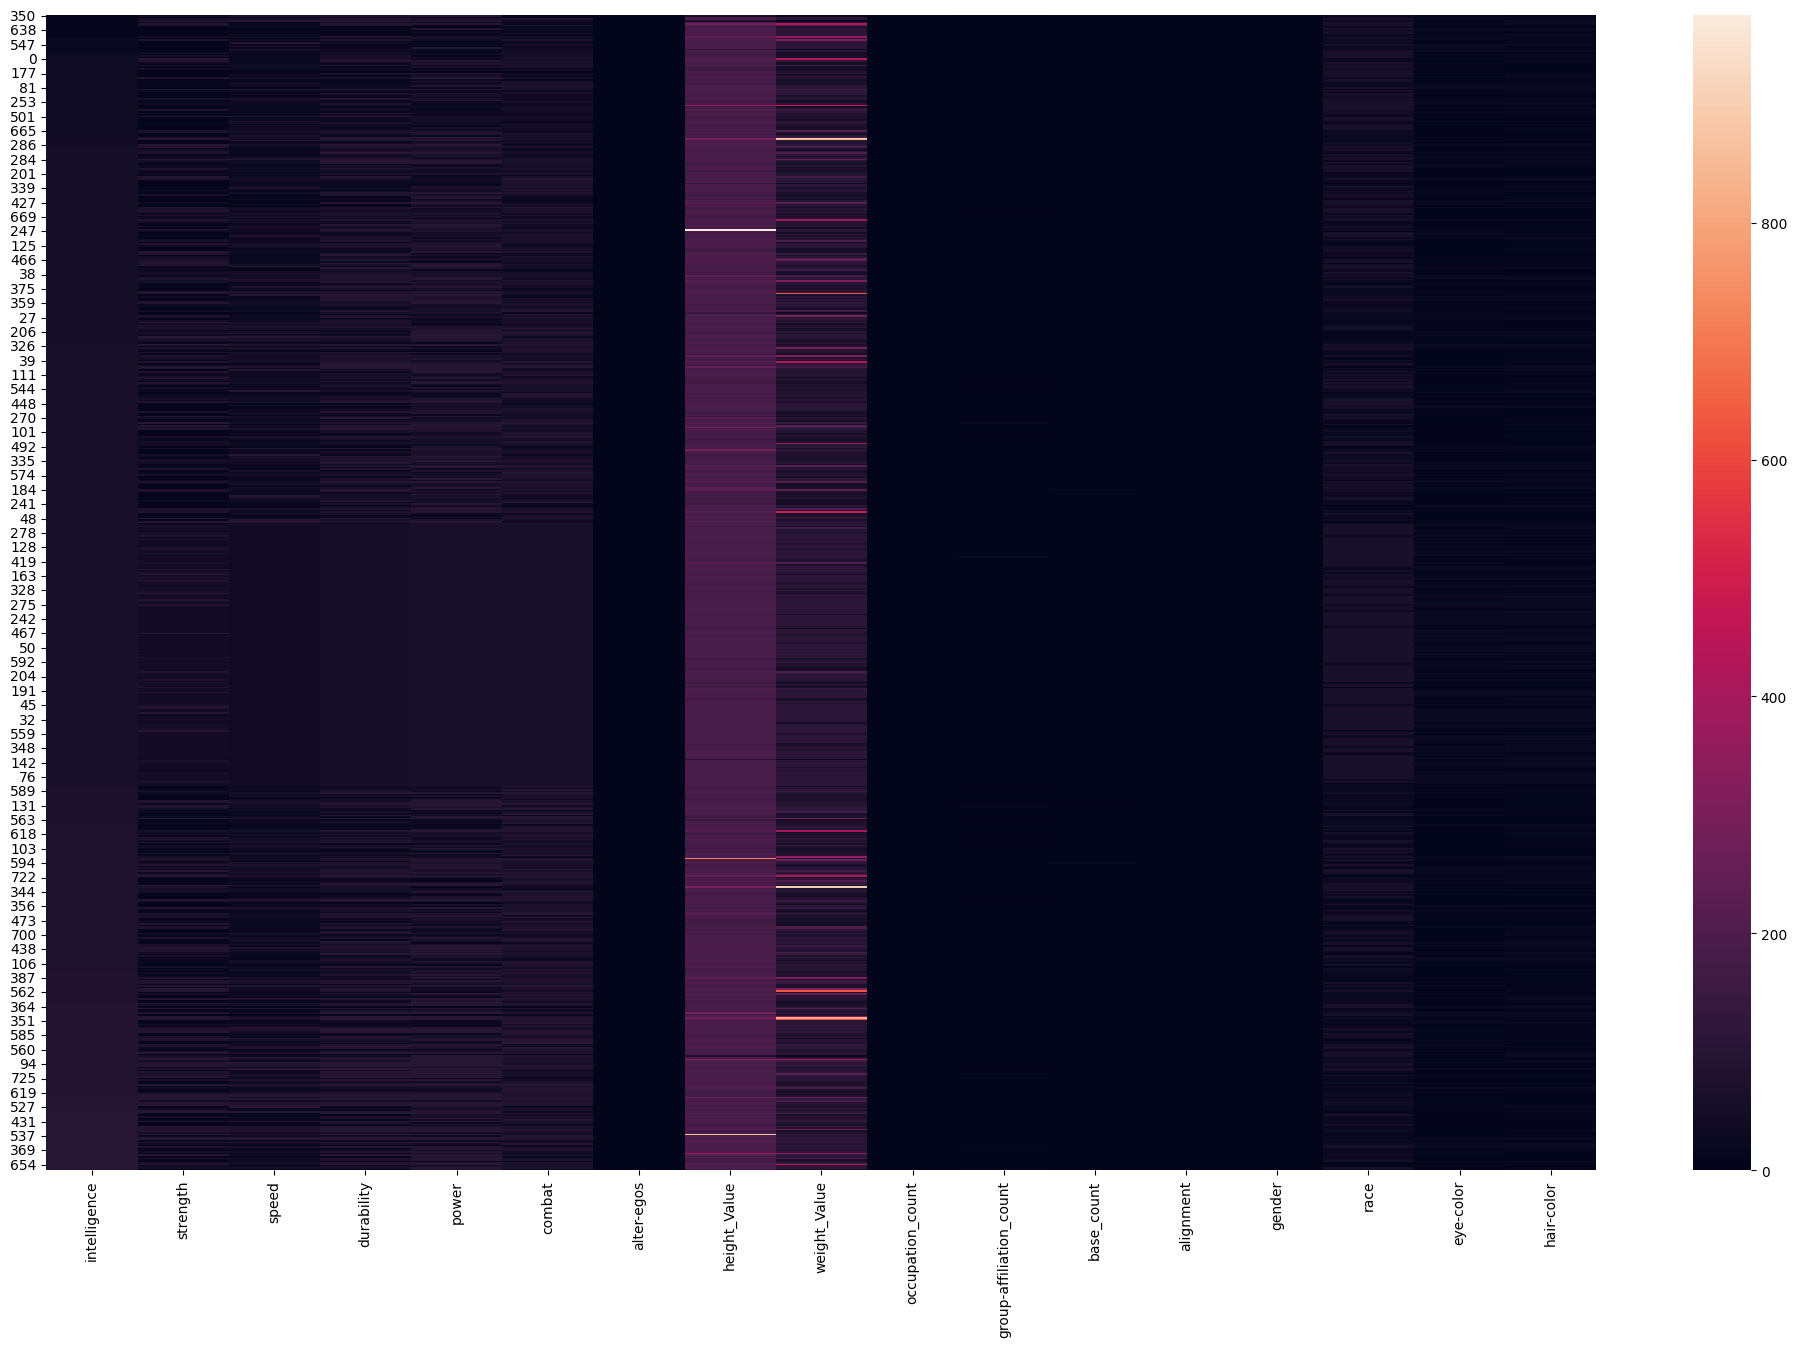

In [21]:
plt.figure(figsize=(25, 15))
sns.heatmap(heros.sort_values('intelligence'))

#<font color='darkred'> **We are going to write assigment if hero can be good, bad or neutral based on data.**</font>


Using

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras import utils
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler

In [23]:
y = utils.to_categorical(heros['alignment'])
X = heros.drop(['alignment'], axis = 1)
#heros.groupby(['alignment']).count()
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(y_test)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [25]:
model = Sequential()

In [26]:

model.add(
    tf.keras.layers.Dense(units = 64,
                             activation = "relu",
                             input_shape = (16,),
                             name="ly1")
)
model.add(
    tf.keras.layers.Dense(units = 32,
                             activation = "relu",
                             name="ly2")
)
model.add(
    tf.keras.layers.Dense(units = 7,
                             activation = "relu",
                             name="ly3")
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ly1 (Dense)                          │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ly2 (Dense)                          │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ly3 (Dense)                          │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,399 (13.28 KB)

 Trainable params: 3,399 (13.28 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.add(
    tf.keras.layers.Dense(units = 3, # Liczba neuronów w warstwie wyjścia - trzy klasy
                             activation = "softmax") # Funkcja aktywacji - softmax dla klasykikacji
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ly1 (Dense)                          │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ly2 (Dense)                          │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ly3 (Dense)                          │ (None, 7)                   │             231 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,423 (13.37 KB)

 Trainable params: 3,423 (13.37 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ly1 (Dense)                          │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ly2 (Dense)                          │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ly3 (Dense)                          │ (None, 7)                   │             231 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │              24 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,423 (13.37 KB)

 Trainable params: 3,423 (13.37 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_split = 0.15, # 15% zbioru uczącego przeznaczonego na walidację
    epochs = 40, # Liczba "pętli/przejść" bo całym zbiorze treningowym
    batch_size = 15) # Wielkość próbki (batcha) dla jednej iteracji algorytmu SGD)

Epoch 1/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.3200 - loss: 1.2358 - val_accuracy: 0.6322 - val_loss: 0.8719
Epoch 2/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6862 - loss: 0.7759 - val_accuracy: 0.6322 - val_loss: 0.8098
Epoch 3/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6802 - loss: 0.7122 - val_accuracy: 0.6322 - val_loss: 0.7787
Epoch 4/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6865 - loss: 0.6988 - val_accuracy: 0.6322 - val_loss: 0.7593
Epoch 5/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6805 - loss: 0.6898 - val_accuracy: 0.6437 - val_loss: 0.7453
Epoch 6/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6915 - loss: 0.6249 - val_accuracy: 0.6552 - val_loss: 0.7305
Epoch 7/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6976 - loss: 0.6463 - val_accuracy: 0.6552 - val_loss: 0.7443
Epoch 8/40
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7201 - loss: 0.5988 - val_accuracy: 0.6667 - val_loss

In [30]:
score = model.evaluate(X_test, y_test)
print('Accuracy in test data:', score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.6428 - loss: 1.0112
Accuracy in test data: 0.6068965792655945


In [31]:
pd.crosstab(y_test[:, 1], np.argmax(model.predict(X_test), axis=-1),
           rownames = ["true"], colnames = ["predicted"])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


predicted,0,1
true,,
0.0,14,23
1.0,30,78


In [32]:
model_v2 = Sequential([
    Dense(
        15,
           activation='relu',
           input_shape=(16,),
           name='init'),
    Dense(
        10,
        activation='relu',
        name='lay1'
    ),
    Dense(3, activation='softmax', name='output')
])
model_v2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ init (Dense)                         │ (None, 15)                  │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lay1 (Dense)                         │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 448 (1.75 KB)

 Trainable params: 448 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model_v2.compile(optimizer='sgd',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [34]:
history_v2 = model_v2.fit(
    x = X_train,
    y = y_train,
    validation_split = 0.2, # 15% zbioru uczącego przeznaczonego na walidację
    epochs = 30, # Liczba "pętli/przejść" bo całym zbiorze treningowym
    batch_size = 20) # Wielkość próbki (batcha) dla jednej iteracji algorytmu SGD)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.3757 - loss: 1.1355 - val_accuracy: 0.5517 - val_loss: 1.0472
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5415 - loss: 1.0108 - val_accuracy: 0.6034 - val_loss: 0.9859
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6314 - loss: 0.9440 - val_accuracy: 0.6121 - val_loss: 0.9483
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6509 - loss: 0.8779 - val_accuracy: 0.6207 - val_loss: 0.9249
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.8476 - val_accuracy: 0.6293 - val_loss: 0.9100
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6958 - loss: 0.8025 - val_accuracy: 0.6293 - val_loss: 0.8993
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6742 - loss: 0.7922 - val_accuracy: 0.6121 - val_loss: 0.8921
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6574 - loss: 0.8198 - val_accuracy: 0.6121 - val_loss

In [35]:
score_v2 = model_v2.evaluate(X_test, y_test)
print('Accuracy in test data:', score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.7490 - loss: 0.6763
Accuracy in test data: 0.6068965792655945


In [36]:
pd.crosstab(y_test[:, 1], np.argmax(model_v2.predict(X_test), axis=-1),
           rownames = ["true"], colnames = ["predicted"])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


predicted,0,1
true,,
0.0,0,37
1.0,1,107


In [37]:
opt_3 = Sequential()

In [38]:

opt_3.add(
    tf.keras.Input(shape=(16,)))
opt_3.add(
    tf.keras.layers.Dense(units = 84, # Liczba neuronów w warstwie ukrytej
                             activation = "relu", # Funkcja aktywacji
                             #input_shape = (16,),# Liczba predyktorów - tylko w pierwszej warstwie
                             name="ll1")
)
opt_3.add(tf.keras.layers.Dropout(0,3))
opt_3.add(
    tf.keras.layers.Dense(units = 32, # Liczba neuronów w warstwie ukrytej
                             activation = "relu",
                             name="ll2") # Funkcja aktywacji
)
#opt_3.add(tf.keras.layers.Dropout(0,3))
opt_3.add(
    tf.keras.layers.Dense(units = 24, # Liczba neuronów w warstwie ukrytej
                             activation = "relu",
                             name="ll3") # Funkcja aktywacji
)
#opt_3.add(tf.keras.layers.Dropout(0,3))
opt_3.add(
    tf.keras.layers.Dense(units = 16, # Liczba neuronów w warstwie ukrytej
                             activation = "relu",
                             name="ll4") # Funkcja aktywacji
)
opt_3.add(
    tf.keras.layers.Dense(units = 3, # Liczba neuronów w warstwie wyjścia - trzy klasy
                             activation = "softmax")# Funkcja aktywacji - softmax dla klasykikacji
 )
opt_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ ll1 (Dense)                          │ (None, 84)                  │           1,428 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ll2 (Dense)                          │ (None, 32)                  │           2,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ll3 (Dense)                          │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ ll4 (Dense)                          │ (None, 16)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,391 (21.06 KB)

 Trainable params: 5,391 (21.06 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
opt_3.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy', # Use sparse_categorical_crossentropy for integer labels
              metrics=['accuracy'])

In [40]:
h_3 = opt_3.fit(
    x = X_train,
    y = y_train,
    validation_split = 0.15, # 15% zbioru uczącego przeznaczonego na walidację
    epochs = 90, # Liczba "pętli/przejść" bo całym zbiorze treningowym
    batch_size = 28) # Wielkość próbki (batcha) dla jednej iteracji algorytmu SGD)

Epoch 1/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 293ms/step - accuracy: 0.6024 - loss: 0.9684 - val_accuracy: 0.6322 - val_loss: 0.8920
Epoch 2/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6995 - loss: 0.7336 - val_accuracy: 0.6437 - val_loss: 0.8707
Epoch 3/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7027 - loss: 0.6905 - val_accuracy: 0.6437 - val_loss: 0.8414
Epoch 4/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7068 - loss: 0.6493 - val_accuracy: 0.6437 - val_loss: 0.8116
Epoch 5/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7051 - loss: 0.6543 - val_accuracy: 0.6322 - val_loss: 0.8059
Epoch 6/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6958 - loss: 0.6612 - val_accuracy: 0.6322 - val_loss: 0.8112
Epoch 7/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7250 - loss: 0.6161 - val_accuracy: 0.6437 - val_loss: 0.8157
Epoch 8/90
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7541 - loss: 0.5751 - val_accuracy: 0.6667 - val_l

In [41]:
predictions = opt_3.predict(X_test)
predicted_classes = tf.argmax(predictions, axis=1).numpy()
predicted_classes

1/5 ━━━━━━━━━━━━━━━━━━━━ 2s 517ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [42]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

if y_test.ndim > 1:
    y_test = np.argmax(y_test, axis=1)

y_pred_probs = opt_3.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1", "Class 2"]))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.20      0.23      0.22        30
     Class 1       0.74      0.75      0.75       108
     Class 2       0.00      0.00      0.00         7

    accuracy                           0.61       145
   macro avg       0.31      0.33      0.32       145
weighted avg       0.59      0.61      0.60       145

Confusion Matrix:
[[ 7 22  1]
 [27 81  0]
 [ 1  6  0]]


In [43]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define a custom Keras classifier
class KerasClassifierCustom(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.001, batch_size=32, epochs=10):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.mo_opt = None

    def create_model(self):
        mo_opt = Sequential()
        mo_opt.add(Dense(64, activation='relu', input_shape=(16,)))  # 16 input features
        mo_opt.add(Dense(32, activation='relu'))
        mo_opt.add(Dense(3, activation='softmax'))  # Assuming 3 classes
        mo_opt.compile(optimizer=Adam(learning_rate=self.learning_rate),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return mo_opt

    def fit(self, X, y):
        self.mo_opt = self.create_model()
        self.mo_opt.fit(X, y, batch_size=self.batch_size, epochs=self.epochs, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.mo_opt.predict(X), axis=-1)

    def score(self, X, y):
        # Evaluate the mo_opt and return accuracy
        return self.mo_opt.evaluate(X, y, verbose=0)[1]  # Returns loss and accuracy, take accuracy


# Use the custom KerasClassifier with GridSearchCV
mo_opt = KerasClassifierCustom()

# Define the hyperparameter grid to search
param_grid = {
    'batch_size': [16, 32],
    'epochs': [30, 50],
    'learning_rate': [0.001, 0.0001]
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=mo_opt, param_grid=param_grid, n_jobs=-1, cv=3)

# Fit the mo_opt using GridSearchCV
grid_result = grid.fit(X_train, y_train)

# Print the best parameters and accuracy
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best accuracy: {grid_result.best_score_}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters: {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.0001}
Best accuracy: 0.6960276365280151


In [44]:
heros2 = heros[heros['alignment']!=2]
heros2.groupby(['alignment']).count()

,intelligence,strength,speed,durability,power,combat,alter-egos,height_Value,weight_Value,occupation_count,group-affiliation_count,base_count,gender,race,eye-color,hair-color
alignment,,,,,,,,,,,,,,,,
0,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206,206
1,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494,494


In [45]:
y2 = utils.to_categorical(heros2['alignment'])
X2 = heros2.drop(['alignment'], axis = 1)
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y2, test_size=0.2, random_state=42)
print(y_test2)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 

In [46]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 7.7 MB/s eta 0:00:00


In [47]:
import optuna
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout


def objective(trial):

    learning_rate = trial.suggest_loguniform('learning_rate', 0.0005, 0.01)
    batch_size = trial.suggest_int('batch_size', 16, 256, step=16)
    epochs = trial.suggest_int('epochs', 10, 150, step=5)
    num_units_1 = trial.suggest_int('num_units_1', 32, 256, step=32)
    num_units_2 = trial.suggest_int('num_units_2', 16, 256, step=16)
    num_units_3 = trial.suggest_int('num_units_3', 8, 128, step=8)
    activation1 = trial.suggest_categorical('activation1', ['relu', 'leaky_relu', 'elu', 'tanh'])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'leaky_relu', 'elu', 'tanh'])
    activation3 = trial.suggest_categorical('activation3', ['relu', 'leaky_relu', 'elu', 'tanh'])
    dropout_rate = trial.suggest_uniform('dropout', 0.2, 0.5)

    model = Sequential()
    model.add(Dense(num_units_1, activation=activation1, input_shape=(X_train2.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_units_2, activation=activation2))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_units_3, activation=activation3))
    model.add(Dropout(dropout_rate))
    model.add(Dense( y_train2.shape[1], activation='softmax'))


    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )



    model.fit(
        X_train2, y_train2,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.15,
        verbose=0
    )


    val_loss, val_accuracy = model.evaluate(X_test2, y_test2, verbose=0)
    return val_accuracy


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)


print(f"Najlepsze hiperparametry: {study.best_params}")
print(f"Najlepsza dokładność: {study.best_value:.4f}")


[I 2024-12-07 10:43:09,222] A new study created in memory with name: no-name-70a32054-8416-4052-bb94-019aee920300
<ipython-input-47-62849f691438>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.0005, 0.01)
<ipython-input-47-62849f691438>:19: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  dropout_rate = trial.suggest_uniform('dropout', 0.2, 0.5)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_r

Najlepsze hiperparametry: {'learning_rate': 0.006511817779414955, 'batch_size': 208, 'epochs': 45, 'num_units_1': 64, 'num_units_2': 96, 'num_units_3': 8, 'activation1': 'relu', 'activation2': 'leaky_relu', 'activation3': 'relu', 'dropout': 0.4718133798390949}
Najlepsza dokładność: 0.8214


Accuracy wzrosla do dosc wysokiej, predykcja jest dosc dobra, bazujemy co prawda na malym pliku wsadowym ale 0,82 jest dosc dobra wartoscia


In [51]:

y_pred_probs = model.predict(X_test2)
y_pred_classes = np.argmax(y_pred_probs, axis=-1)

confusion_matrix_crosstab = pd.crosstab(
    y_test2[:, 1],
    y_pred_classes,
    rownames=["True Class"],
    colnames=["Predicted Class"]
)
print(confusion_matrix_crosstab)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Predicted Class   0   1
True Class             
0.0              24   7
1.0              16  93


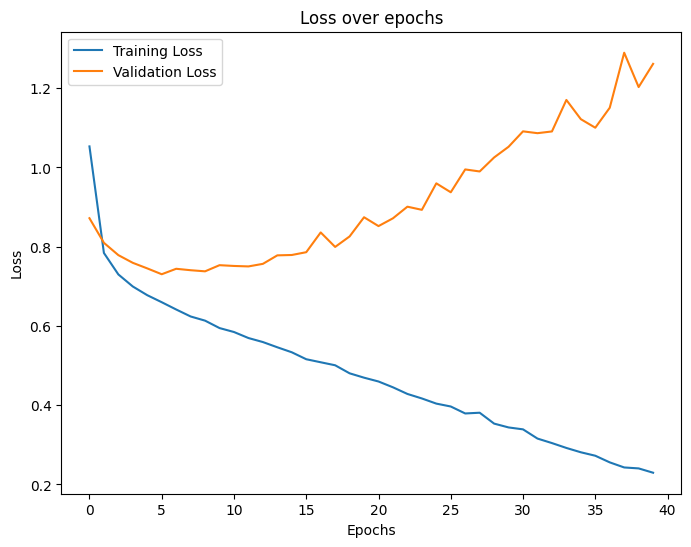

In [65]:
# Uzyskaj historię
history_loss = history.history['loss']
history_val_loss = history.history['val_loss']
epochs = range(len(history_loss))

# Wykres
plt.figure(figsize=(8, 6))
plt.plot(epochs, history_loss, label='Training Loss')
plt.plot(epochs, history_val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()


Niestety widzimy ze nastapilo overfitting - model nauczyl sie na pamiec danych, moznaby to rozwiazac zmniejszeniem epok, rozdzieleniem dropout w optunie, dodaniem regularyzacji - np L2 czyli dodaniu kar

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


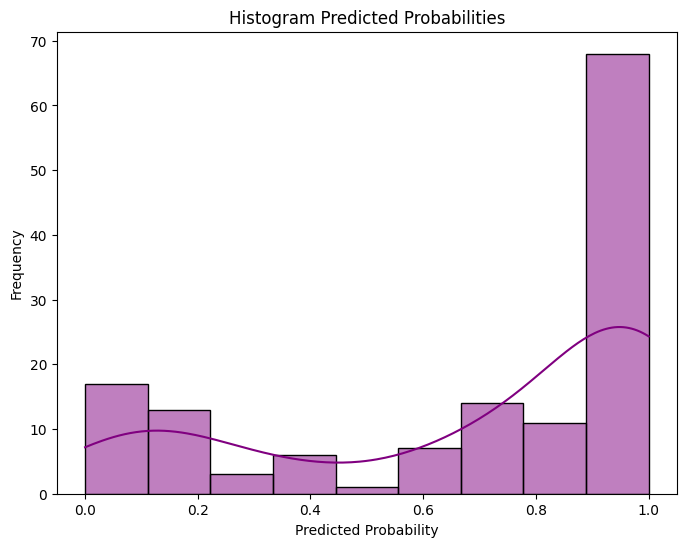

In [66]:
plt.figure(figsize=(8, 6))
sns.histplot(model.predict(X_test2)[:, 1], kde=True, color='purple', edgecolor='k')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram Predicted Probabilities')
plt.show()
